In [20]:
#useful lybraries are imported
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data Preparation:
**A. Read both the Datasets 'Data1' and 'Data2' as DataFrames and store them into two separate variables.**

In [21]:
import pandas as pd

# Assuming you have the data files 'Data1.csv' and 'Data2.csv'
data1 = pd.read_csv('Data1.csv')
data2 = pd.read_csv('Data2.csv')



**B. Print the shape and column names and data types of both DataFrames.**

In [22]:
print("Data1 Shape:", data1.shape)
print("Data1 Columns:", data1.columns)
print("Data1 Data Types:", data1.dtypes)

Data1 Shape: (5000, 8)
Data1 Columns: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Data1 Data Types: ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [23]:
print("Data2 Shape:", data2.shape)
print("Data2 Columns:", data2.columns)
print("Data2 Data Types:", data2.dtypes)

Data2 Shape: (5000, 7)
Data2 Columns: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
Data2 Data Types: ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard              object
LoanOnCard             float64
dtype: object


**C. Merge both DataFrames on 'ID' feature to form a single DataFrame.**

In [24]:
merged_data = pd.merge(data1, data2, on='ID')

merged_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,?,NaN


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11), object(1)
memory usage: 547.0+ KB


**D. Change the data type of the following features to 'Object':**

>
*   'CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore'.

In [26]:
merged_data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']] = merged_data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']].astype('object')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


# Data Exploration and Analysis:

**A. Visualize the distribution of the Target variable 'LoanOnCard'**

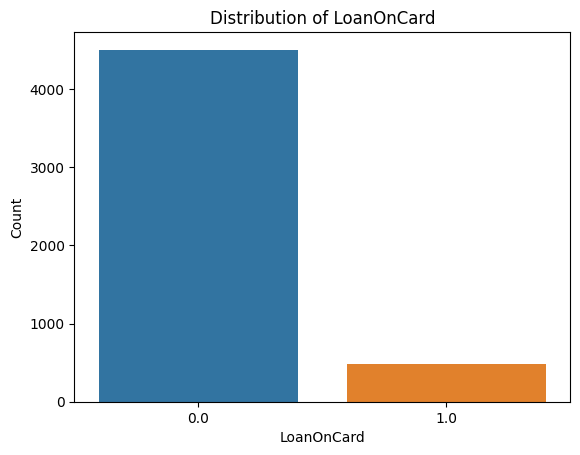

In [27]:
sns.countplot(x='LoanOnCard', data=merged_data)
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.title('Distribution of LoanOnCard')
plt.show()

**B. Check the percentage of missing values**

In [28]:
# Check for missing values
missing_percentage = merged_data.isnull().sum() / len(merged_data) * 100

print(missing_percentage)


ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


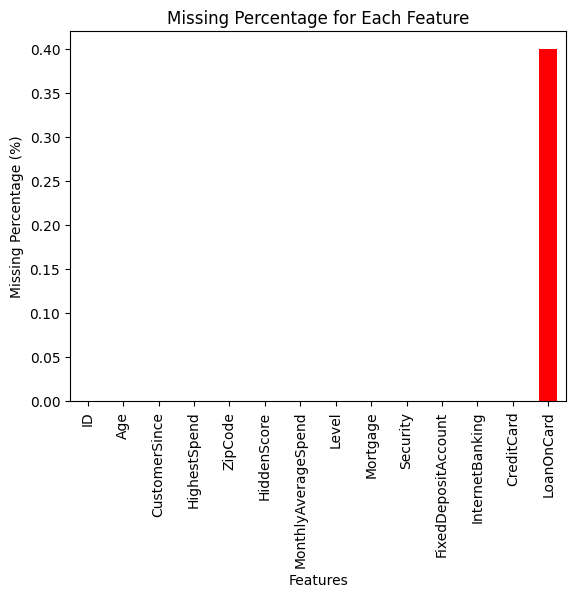

In [29]:
missing_percentage.plot(kind='bar', color='red')
plt.xlabel('Features')
plt.ylabel('Missing Percentage (%)')
plt.title('Missing Percentage for Each Feature')
plt.show()

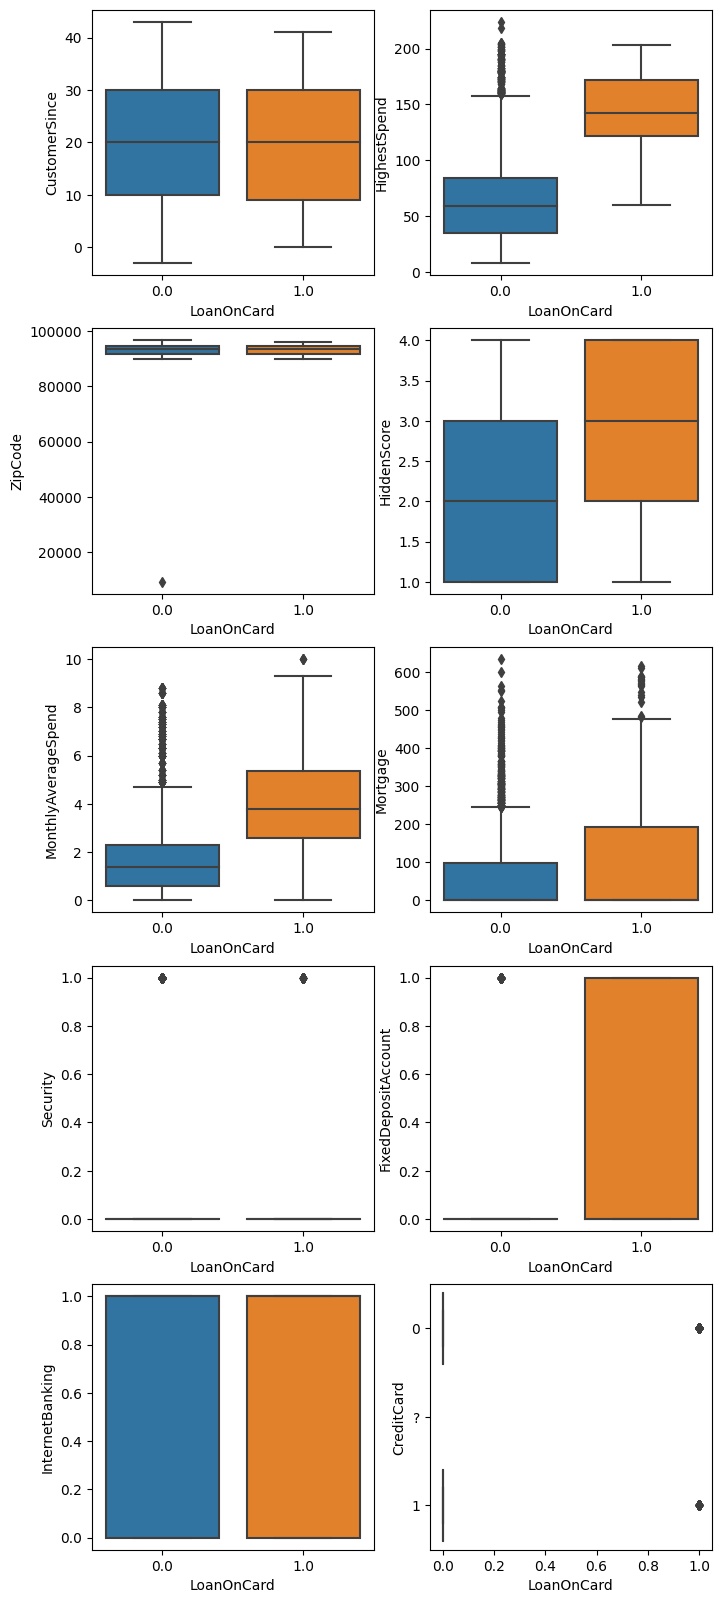

In [30]:
lst = ['ID', 'Age', 'LoanOnCard','Level']
j=1
plt.figure(figsize=(8, 20))
for i in merged_data:
    if i not in lst:
        plt.subplot(5,2,j)
        sns.boxplot(data=merged_data, y=i, x="LoanOnCard")
        j+=1


**Imputing Missing Vaules in Loan On Cards**

<Axes: xlabel='LoanOnCard', ylabel='HiddenScore'>

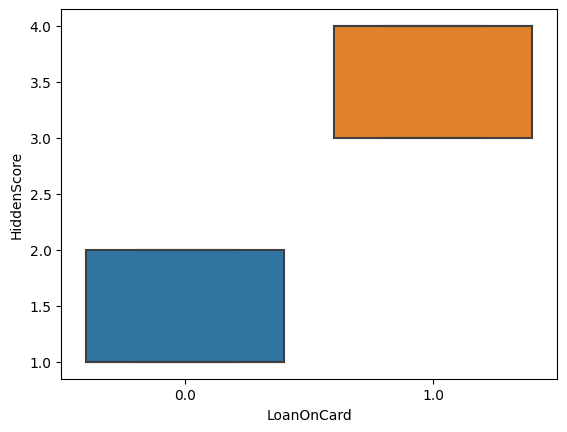

In [41]:
sns.boxplot(data=merged_data, y="HiddenScore", x="LoanOnCard")

In [32]:
# Impute missing values with the mean
#merged_data['LoanOnCard'].fillna(merged_data['LoanOnCard'].mean(), inplace=True)

# or

# Impute missing values with the 0
#merged_data['LoanOnCard'].fillna(0, inplace=True)

# Update 'LoanOnCard' values based on 'HiddenScore' condition
merged_data.loc[merged_data['HiddenScore'] <= 2, 'LoanOnCard'] = 0
merged_data.loc[merged_data['HiddenScore'] >= 3, 'LoanOnCard'] = 1

# Check for missing values
missing_percentage = merged_data.isnull().sum() / len(merged_data) * 100

print(missing_percentage)


ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64


**C. Check for unexpected values in each categorical variable**

In [33]:
categorical_features = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

unexpected_values = ['?', 'a', 1.5]  # List of unexpected values to be treated

for feature_name in categorical_features:
    for unexpected_value in unexpected_values:
        if unexpected_value in merged_data[feature_name].unique():            
            replacement_value = merged_data[feature_name].mode()[0]            
            merged_data.loc[merged_data[feature_name] == unexpected_value, feature_name] = replacement_value

    # Print the updated unique values in the categorical feature
    print(f"Unique values in {feature_name} after imputation:")
    print(merged_data[feature_name].unique())


Unique values in CreditCard after imputation:
['0' '1']
Unique values in InternetBanking after imputation:
[0 1]
Unique values in FixedDepositAccount after imputation:
[0 1]
Unique values in Security after imputation:
[1 0]
Unique values in Level after imputation:
[1 2 3]
Unique values in HiddenScore after imputation:
[4 3 1 2]


In [34]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


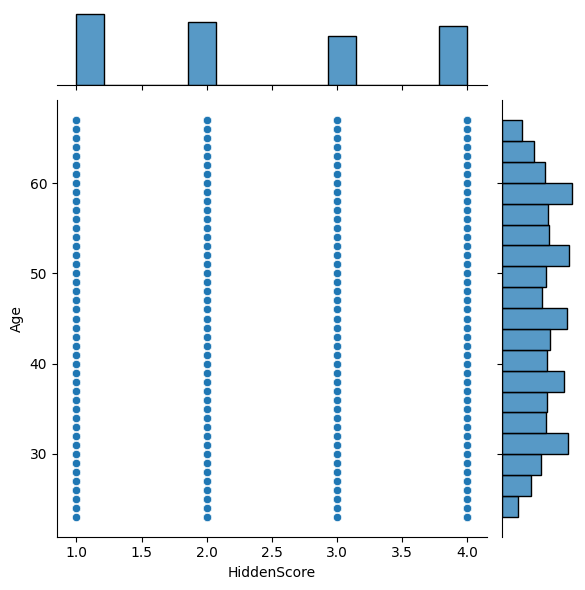

In [35]:
sns.jointplot(data=merged_data, x="HiddenScore", y="Age")

print()